In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import cv2
import os
import random

In [47]:
train_dir = './dc_2000'
X = np.zeros((1600,75,75,3),dtype=np.float32)
y = np.zeros((1600,1),dtype=np.int8)
val_data = np.zeros((400,75,75,3),dtype=np.float32)
val_label = np.zeros((400,1),dtype=np.int8)
for i,j in enumerate(os.listdir(train_dir+'/train/cat')):
    img = cv2.imread(train_dir+'/train/cat/'+j)
    img = cv2.resize(img,(75,75))
    if i>=800 :
        val_data[i-800] = img/255
        val_label[i-800] = 0
    else:
        X[i] = img/255
        y[i] = 0#cat = 0
    
for i, j in enumerate(os.listdir(train_dir + '/train/dog')):
    img = cv2.imread(train_dir + '/train/dog/' + j)
    img = cv2.resize(img, (75, 75))
    if i>=800 :
        val_data[200+i-800] = img/255
        val_label[200+i-800] = 1
    else:
        X[800+i] = img/255
        y[800+i] = 1#cat = 0
    # cv2.imshow('1',img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

In [48]:
ziplist = [i for i in zip(X, y)]
random.shuffle(ziplist)
X[:], y[:] = zip(*ziplist)
zip2list = [i for i in zip(val_data,val_label)]
random.shuffle(zip2list)
val_data[:], val_label[:] = zip(*zip2list)

In [44]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(0.00004),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 5, 128)        

In [49]:
history = model.fit(X,y,batch_size=100,epochs=30,validation_data=(val_data,val_label))

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 15s 9ms/step - loss: 2.3084 - accuracy: 0.2756 - val_loss: 1.2976 - val_accuracy: 0.2950
Epoch 2/30
1600/1600 [==============================] - 15s 10ms/step - loss: 0.9947 - accuracy: 0.2756 - val_loss: 0.7268 - val_accuracy: 0.2950
Epoch 3/30
1600/1600 [==============================] - 16s 10ms/step - loss: 0.6414 - accuracy: 0.6369 - val_loss: 0.6045 - val_accuracy: 0.7050
Epoch 4/30
1600/1600 [==============================] - 16s 10ms/step - loss: 0.5801 - accuracy: 0.7244 - val_loss: 0.6026 - val_accuracy: 0.7050
Epoch 5/30
1600/1600 [==============================] - 16s 10ms/step - loss: 0.5773 - accuracy: 0.7244 - val_loss: 0.6026 - val_accuracy: 0.7050
Epoch 6/30
1600/1600 [==============================] - 16s 10ms/step - loss: 0.5757 - accuracy: 0.7244 - val_loss: 0.6029 - val_accuracy: 0.7050
Epoch 7/30
1600/1600 [==============================] - 16s 10ms/step - loss: 

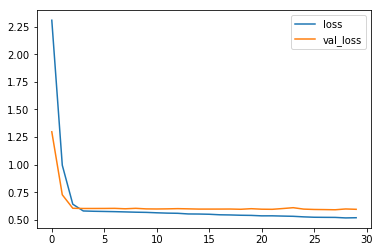

In [55]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

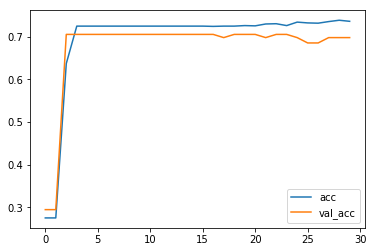

In [56]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [57]:
model.save('CNN_model.h5')